#### K Means

O algoritmo K Means é um método de aprendizado não supervisionado que agrupa os dados tentando separá-los em grupos disjuntos, de mesma variância, minimizando a soma dos quadrados dentro de cada cluster. O número de clusters ou grupos é determinado pelo K. O centro dos clusters é chamado de centróide podendo ou não ser um dado real.

Comumente confundido com o `KNN` é importante observar que o KNN é um algoritmo supervisionado utilizado para classificação e o `K-Means` é um algoritmo de aprendizado não supervisionado utilizado para agrupamento.

In [9]:
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Será utilizado a base de dados `iris` que está presente no módulo `sklearn.datasets`. É uma base de dados que conta com a distribuição do tamanho da pétala e sépala de 3 classes de flores:
* Iris Setosa
* Iris Veriscolor
* Iris Virginica

É um dataset mto utilizado para prática de machine learning e está presente em vários ambientes como o `R` por exemplo.

In [2]:
iris = datasets.load_iris()
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

Pelo método `unique` da biblioteca `numpy` é gerado os valores únicos do atributo `target` que é a classe em que os dados serão classificados, observa-se que as classes são 0, 1 e 2 e são 50 entradas para cada uma.

O modelo é criado utilizando a classe `KMeans` da biblioteca `sklearn`. Essa classe possui o método `fit` que utiliza os dados de treino das variáveis independentes e das variáveis dependentes para gerar o modelo.

Para utilizar a classe, é possível passar o número de clusters como parâmetro para o argumento `n_cluesters` que é o número de grupos que será gerado para se agrupar os dados.

In [11]:
modelo = KMeans(n_clusters=3)
modelo.fit(iris.data, iris.target)

KMeans(n_clusters=3)

O atributo `cluster_centers_` retorna a posição de cada centróide criado em relação aos dados utilizados para gerá-los.

In [12]:
modelo.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Com o modelo criado é possível testá-lo utilizando o método `predict` que passando um valor ou um array de valores, ele resulta na previsão dos dados.

In [13]:
previsoes = modelo.labels_
print(previsoes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Como esses dados são históricos, é possível saber qual foi o real resultado, se dado cliente é ou não um bom pagador. Uma outra forma de visualizar essa relação, é utilizando uma matriz de confusão, utilizando o método `confusion_matrix` da biblioteca `sklearn`.

In [14]:
confusion_matrix(iris.target, previsoes)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

É possível utilizar o método `accuracy_score` que já faz esse cálculo da taxa de acerto.

In [15]:
accuracy_score(iris.target, previsoes)

0.8933333333333333

Com uma taxa de acero de 89,3%, que é uma taxa muito alta, verifica-se que os dados foram agrupados, clusterizados de forma bem semelhante aos dados reais.

Utilizando o método `scatter` da biblioteca `matplotlib` é gerado so gráficos das previsões do modelo, para ficar mais clara a representação em forma de clusters do modelo.

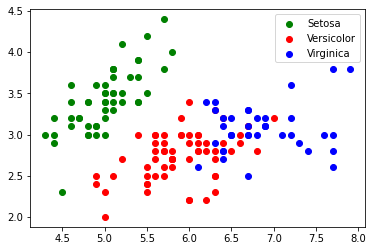

In [17]:
plt.scatter(
    iris.data[previsoes == 0, 0],
    iris.data[previsoes == 0, 1],
    c="green",
    label="Setosa"
)
plt.scatter(
    iris.data[previsoes == 1, 0],
    iris.data[previsoes == 1, 1],
    c="red",
    label="Versicolor"
)
plt.scatter(
    iris.data[previsoes == 2, 0],
    iris.data[previsoes == 2, 1],
    c="blue",
    label="Virginica"
)
plt.legend()